In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard = pd.read_csv("Data/CC General.csv")
creditcard.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Check the info of the dataset
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
creditcard.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Review the information of customers who make the largest purchase with a single payment
creditcard[creditcard['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
# Check the customer details that have the highest balance
creditcard[creditcard['BALANCE'] == 19043.138560]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
138,C10144,19043.13856,1.0,22009.92,9449.07,12560.85,0.0,1.0,0.75,1.0,0.0,0,216,18000.0,23018.57583,18621.01331,0.0,12


<AxesSubplot:>

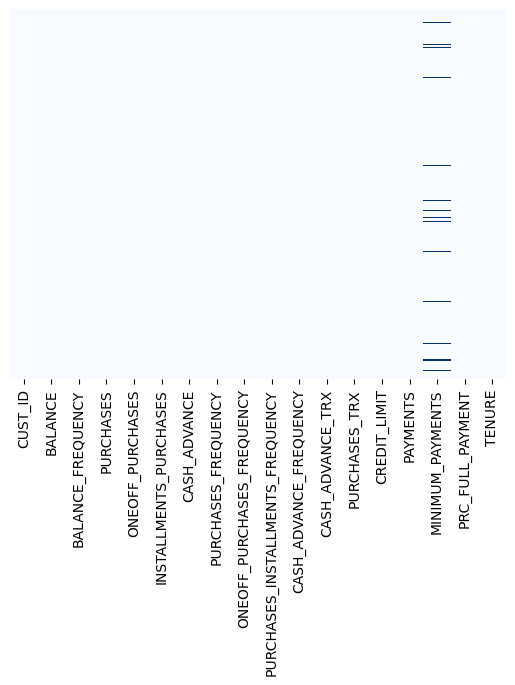

In [7]:
# Check for any missing values using heatmap

sns.heatmap(creditcard.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

# Column Minimum payments have missing values

In [8]:
# Check missing values
creditcard.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

C:\Users\hafiz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

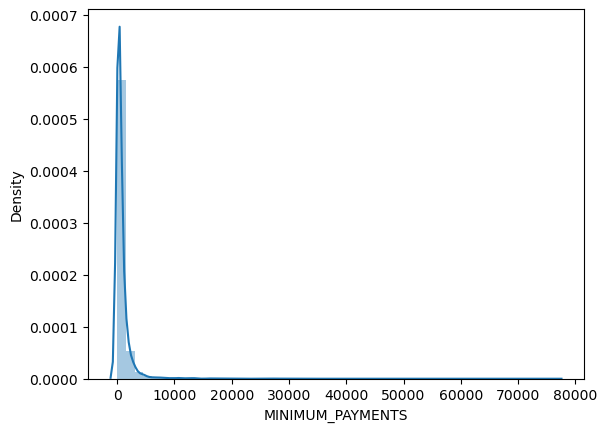

In [9]:
# Check the plot of MINIMUM_PAYMENTS
sns.distplot(creditcard['MINIMUM_PAYMENTS'])

In [10]:
# Replace missing values of column MINIMUM_PAYMENTS with the mean of the column MINIMUM_PAYMENTS 

creditcard.loc[(creditcard['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard['MINIMUM_PAYMENTS'].mean()

C:\Users\hafiz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

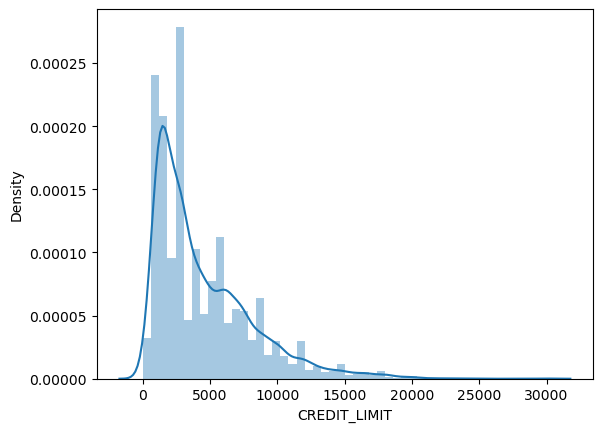

In [11]:
# Check the plot of CREDIT_LIMIT
sns.distplot(creditcard['CREDIT_LIMIT'])

In [12]:
# Replace missing values of column CREDIT_LIMIT with the median of the column CREDIT_LIMIT 

creditcard.loc[(creditcard['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard['CREDIT_LIMIT'].median()

In [13]:
# Check for missing values again
creditcard.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
# Check for any duplicated values
creditcard.duplicated().sum()

0

In [15]:
# Drop Column CUST_ID, because it's insignificant
creditcard.drop("CUST_ID", axis = 1, inplace = True)

In [16]:
# check if the column CUST_ID are succesfully being removed
creditcard.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
# The number of columns
len(creditcard.columns)

17

In [18]:
# columns name
creditcard.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\hafiz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hafiz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hafiz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hafiz\anaconda3\lib\si

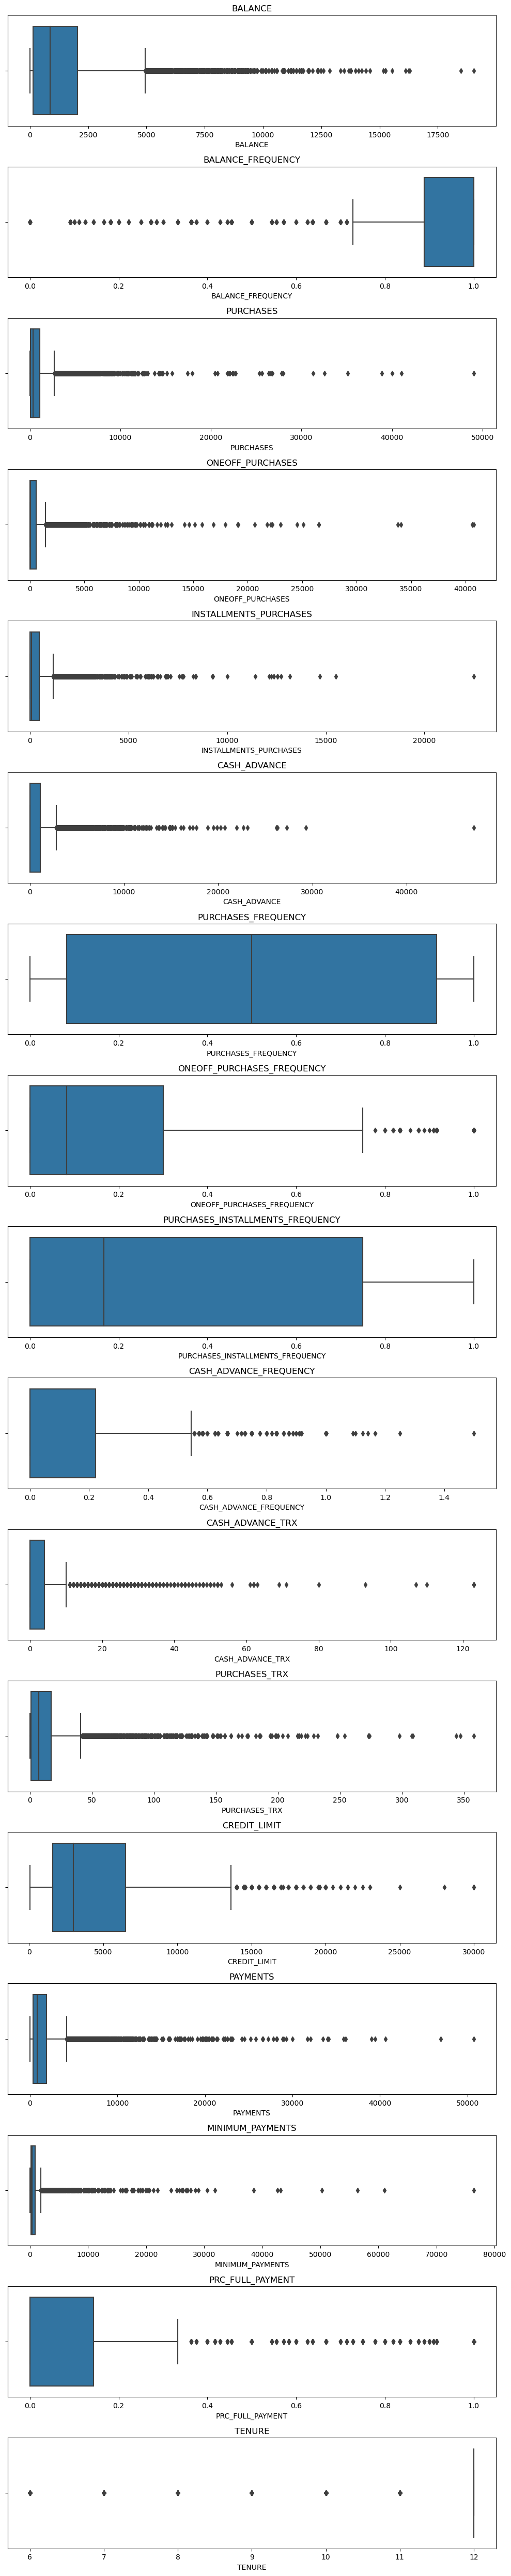

In [19]:
# Plot all the columns in box plot
plt.figure(figsize = (10,50))
for i in range(len(creditcard.columns)):
    plt.subplot(17, 1, i + 1)
    sns.boxplot(creditcard[creditcard.columns[i]])
    plt.title(creditcard.columns[i])
plt.tight_layout()

C:\Users\hafiz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hafiz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hafiz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

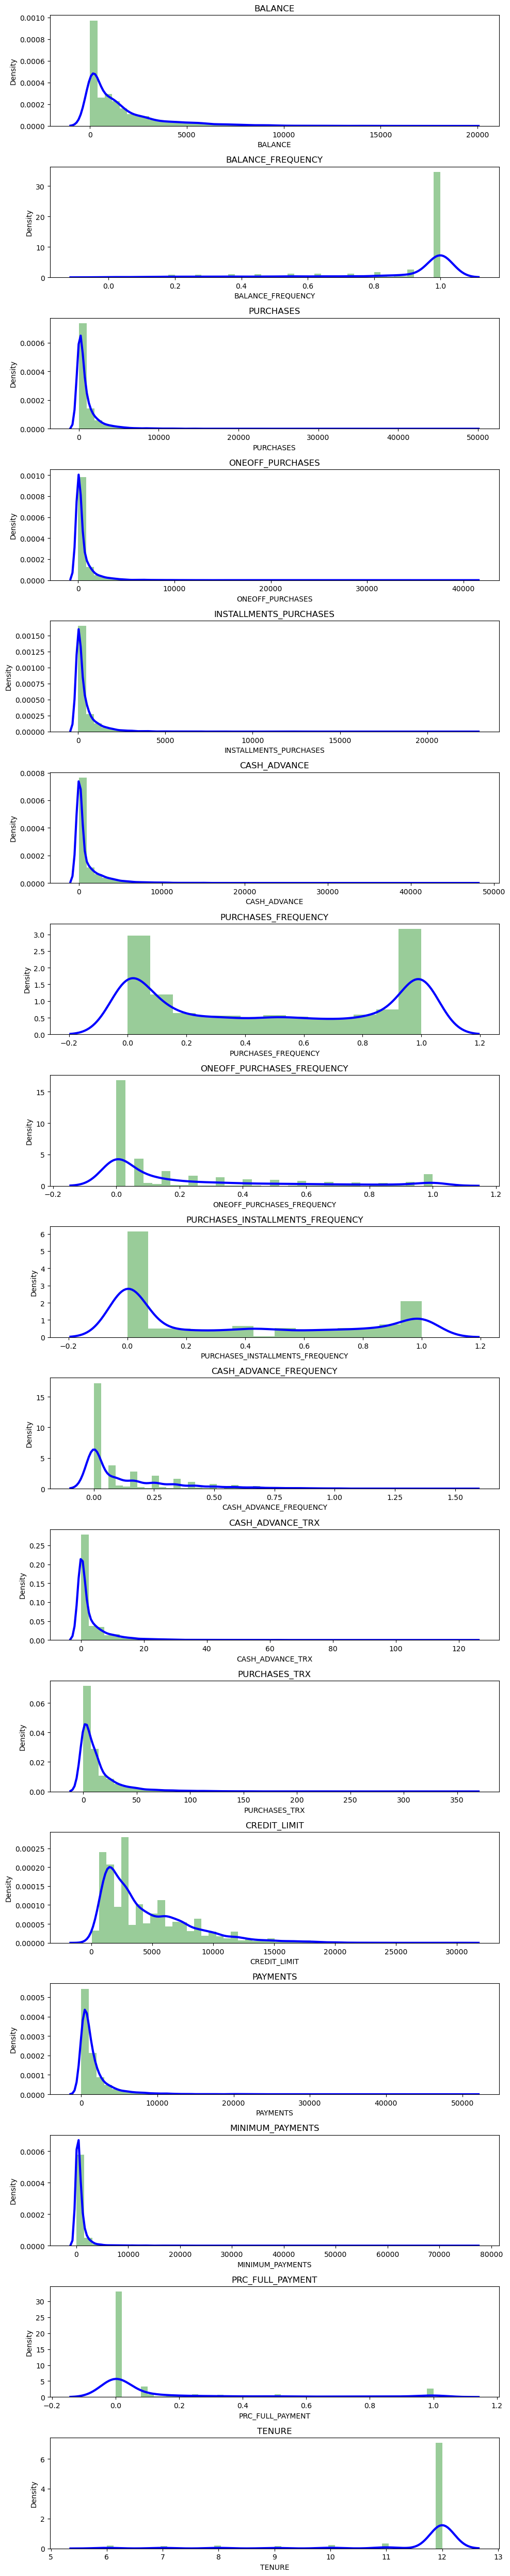

In [20]:
# Plot all the columns in distribution plot
plt.figure(figsize = (10,50))
for i in range(len(creditcard.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(creditcard[creditcard.columns[i]], 
                 kde_kws = {"color" : "b", "lw" : 3, "label" : "KDE"},
                hist_kws = {"color" : "g"})
    plt.title(creditcard.columns[i])
plt.tight_layout()

In [21]:
correlations = creditcard.corr()

<AxesSubplot:>

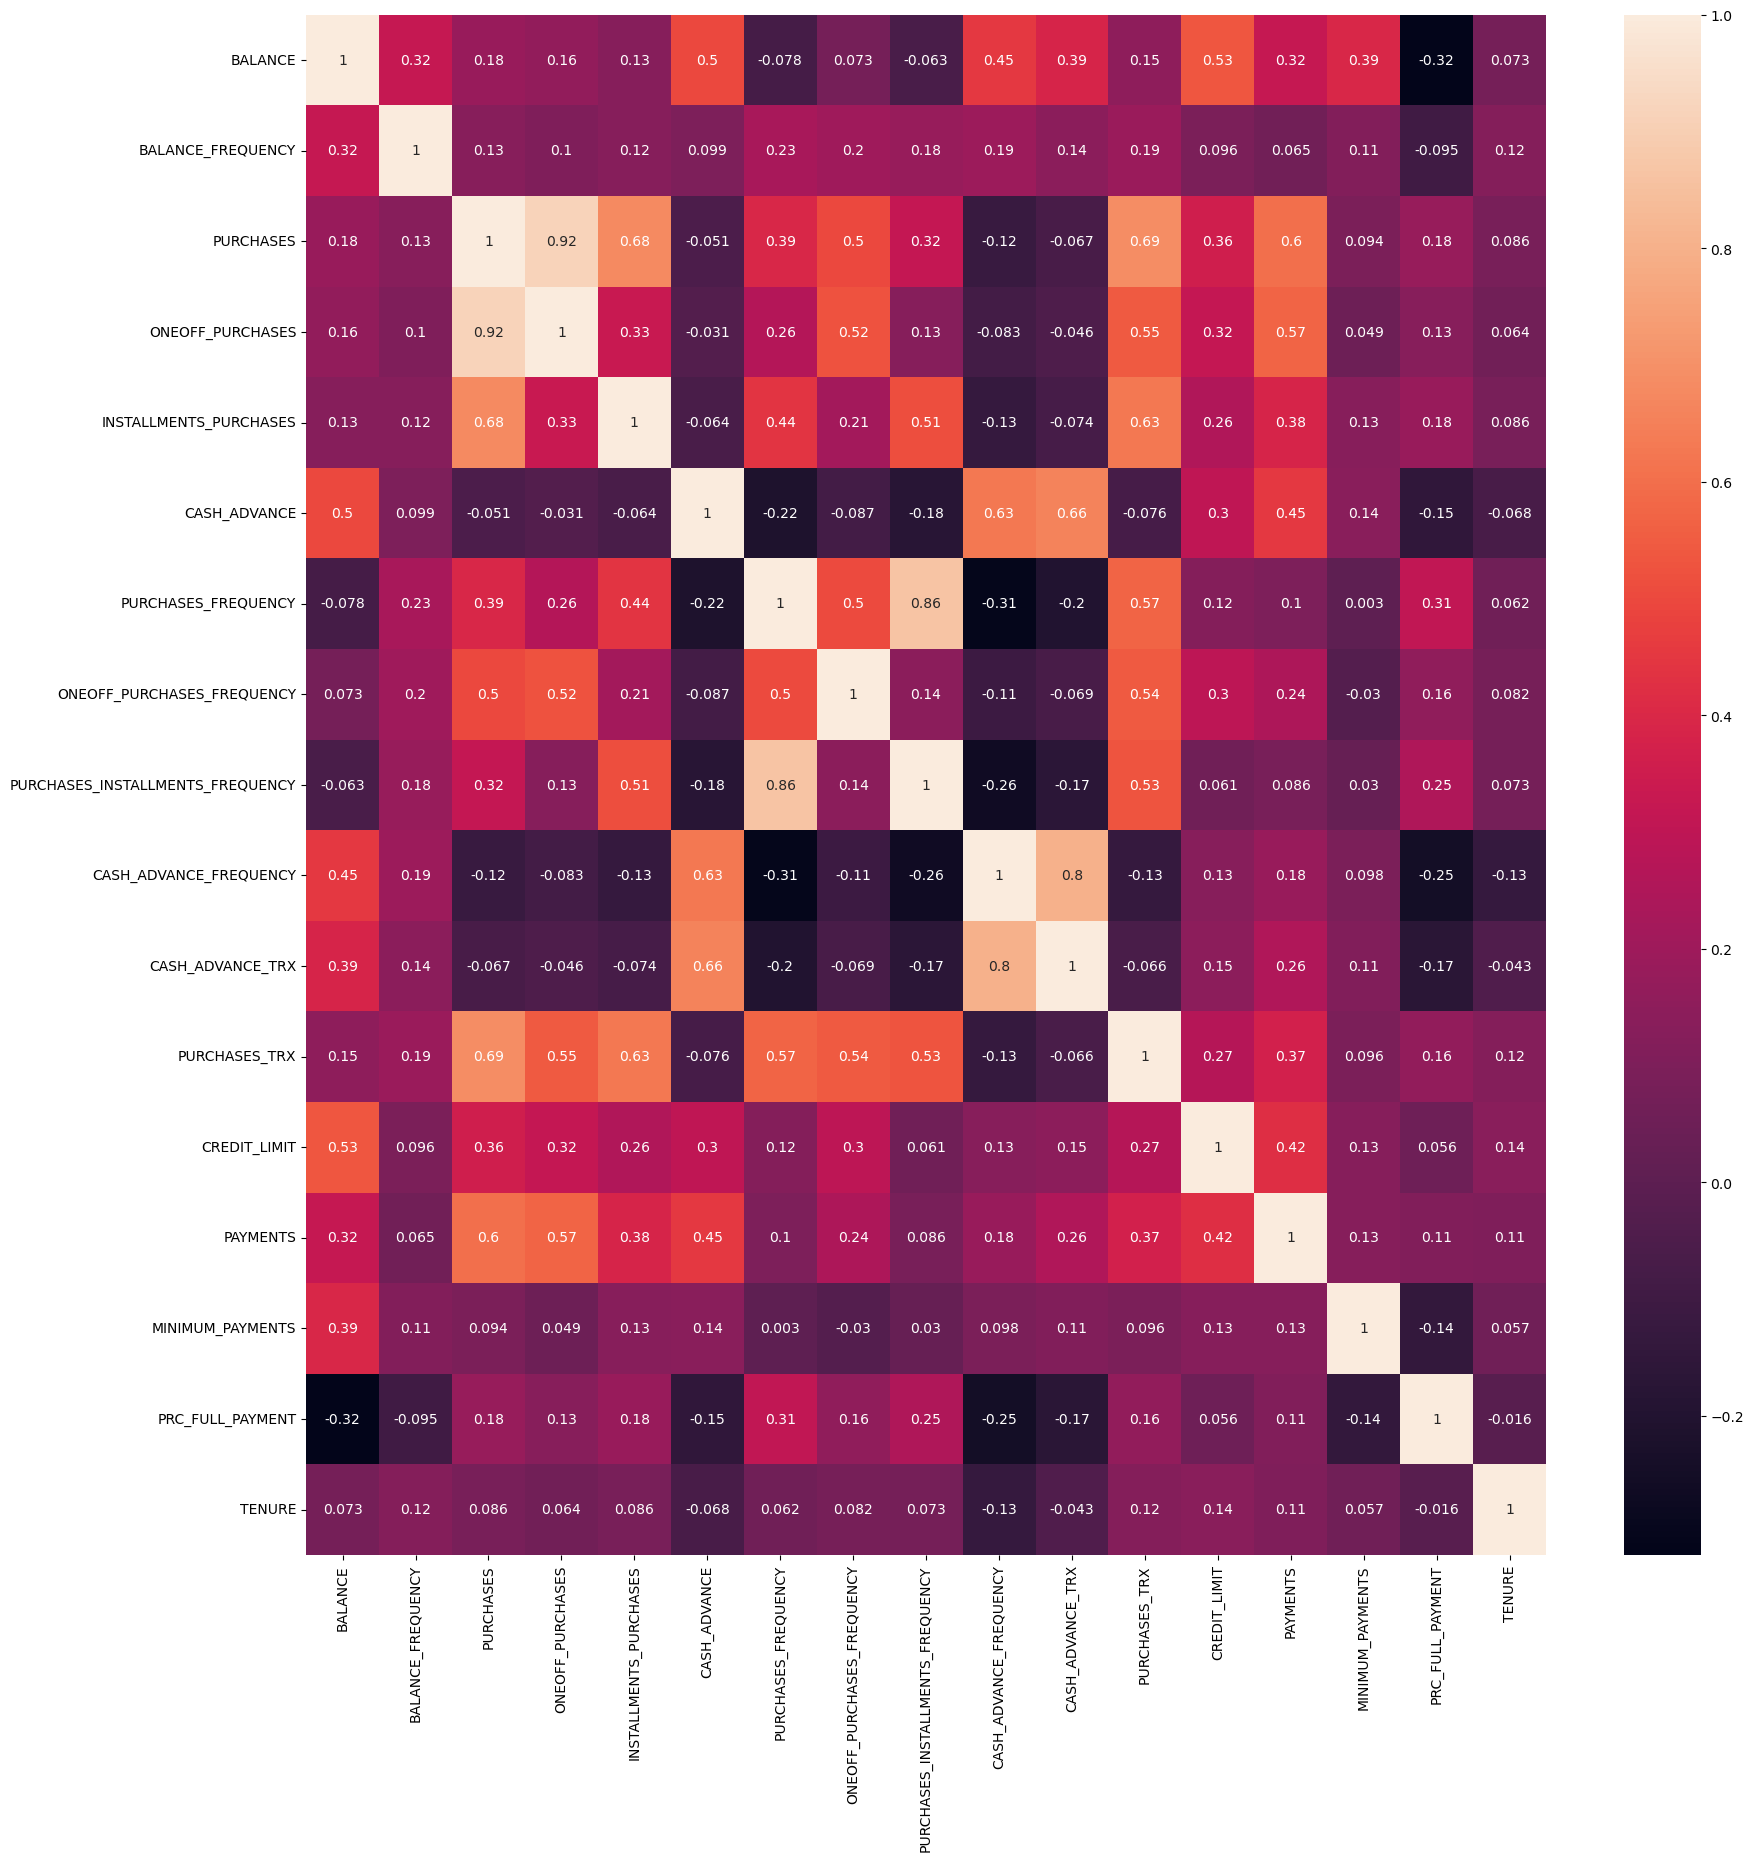

In [22]:
# Heatmap
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

# Data Scaling

In [23]:
scaler = StandardScaler()
creditcard_scaled = scaler.fit_transform(creditcard)

In [24]:
# Check the size of scaled data
creditcard_scaled.shape

(8950, 17)

In [25]:
creditcard_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

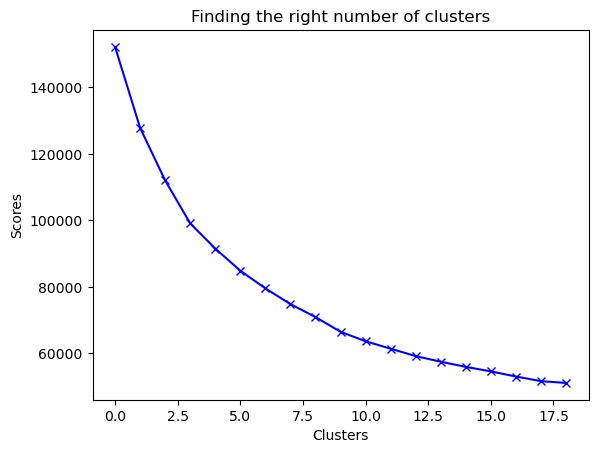

In [26]:
# Find the good number of cluster

scores_1 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_scaled)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title("Finding the right number of clusters")
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [27]:
# Pick 9 as number of cluster
kmeans = KMeans(9)
kmeans.fit(creditcard_scaled)
labels = kmeans.labels_

In [28]:
kmeans.cluster_centers_.shape

(9, 17)

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.313501,-0.357492,-0.295218,-0.212813,-0.306664,0.093876,-0.253791,-0.285467,-0.275256,0.360583,0.023718,-0.396751,-0.562100,-0.393257,-0.204827,-0.086576,-3.225829
1,0.024629,0.404343,-0.365355,-0.245816,-0.412144,-0.074537,-0.896146,-0.407062,-0.791625,0.137605,-0.006295,-0.495026,-0.297325,-0.245497,-0.006501,-0.455274,0.272934
2,1.076698,0.467625,2.541526,1.856488,2.598806,-0.154956,1.165966,1.603923,1.267375,-0.279684,-0.143267,3.181737,1.305352,1.460337,0.583095,0.220766,0.336716
3,1.715058,0.390433,-0.216937,-0.149454,-0.238423,2.087371,-0.493119,-0.205540,-0.434407,1.944460,1.979922,-0.274203,1.056575,0.862706,0.524532,-0.388971,0.069783
4,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185167,9.047799,1.030898,1.222264,0.298409
5,-0.704673,0.069242,-0.019323,-0.253233,0.418956,-0.456498,0.885154,-0.387601,1.049212,-0.656037,-0.466549,0.102422,-0.134122,-0.225116,-0.291320,2.137232,0.101045
6,-0.699720,-2.208854,-0.319434,-0.234442,-0.324432,-0.312201,-0.599580,-0.442401,-0.479240,-0.508887,-0.367495,-0.430980,-0.183209,-0.201072,-0.253222,0.118191,0.191467
7,-0.175494,0.375163,-0.030568,-0.204271,0.302923,-0.312323,0.929097,-0.298794,1.126010,-0.375890,-0.299225,0.204313,-0.268879,-0.186675,0.084606,-0.353524,0.280895
8,-0.134715,0.403182,0.545983,0.694334,0.015205,-0.329818,0.973356,1.966262,0.104160,-0.410363,-0.328978,0.612968,0.447742,0.140405,-0.160152,0.390876,0.269224


In [30]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,911.949718,0.792584,372.466728,239.211970,133.755593,1175.733621,0.388492,0.117297,0.255043,0.207300,3.410684,4.848080,2449.115192,594.703396,386.866602,0.128393,7.200334
1,1615.737165,0.973056,222.617971,184.433549,38.370677,822.562618,0.130684,0.081023,0.049825,0.162680,3.205871,2.405344,3412.482750,1022.452800,849.055634,0.020555,11.882574
2,3805.530937,0.988047,6433.213732,3673.827668,2761.135335,653.920467,0.958309,0.680939,0.868124,0.079177,2.271137,93.795918,9243.731778,5960.677767,2223.085922,0.218285,11.967930
3,5134.223770,0.969761,539.716472,344.375170,195.464988,5356.186424,0.292438,0.141141,0.191793,0.524251,16.760341,7.894161,8338.570007,4230.592092,2086.605922,0.039947,11.610706
4,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
5,97.756577,0.893673,961.920975,172.122585,789.924068,21.573713,0.845605,0.086829,0.781421,0.003865,0.064972,17.255650,4006.288521,1081.453761,185.297355,0.778819,11.652542
6,108.066113,0.354014,320.730018,203.310924,117.687935,324.170826,0.249710,0.070481,0.173975,0.033311,0.740942,3.997283,3827.685185,1151.059605,274.082303,0.188284,11.773551
7,1199.199535,0.966143,937.895949,253.389805,684.996870,323.916010,0.863242,0.113322,0.811943,0.059925,1.206833,19.788286,3515.981043,1192.738784,1061.376558,0.050315,11.893228
8,1284.076379,0.972781,2169.706176,1744.888871,424.817306,287.226735,0.881006,0.789032,0.405833,0.053026,1.003795,29.945920,6123.365534,2139.602198,490.979534,0.268039,11.877609


In [31]:
# Check the size/shape
labels.shape

(8950,)

In [32]:
# Check the maximum value of labels
labels.max()

8

In [33]:
labels.min()

0

In [34]:
y_kmeans = kmeans.fit_predict(creditcard_scaled)
y_kmeans

array([2, 0, 4, ..., 7, 7, 7])

In [35]:
creditcard_cluster = pd.concat([creditcard, pd.DataFrame({'cluster' : labels})], axis = 1)
creditcard_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,8
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


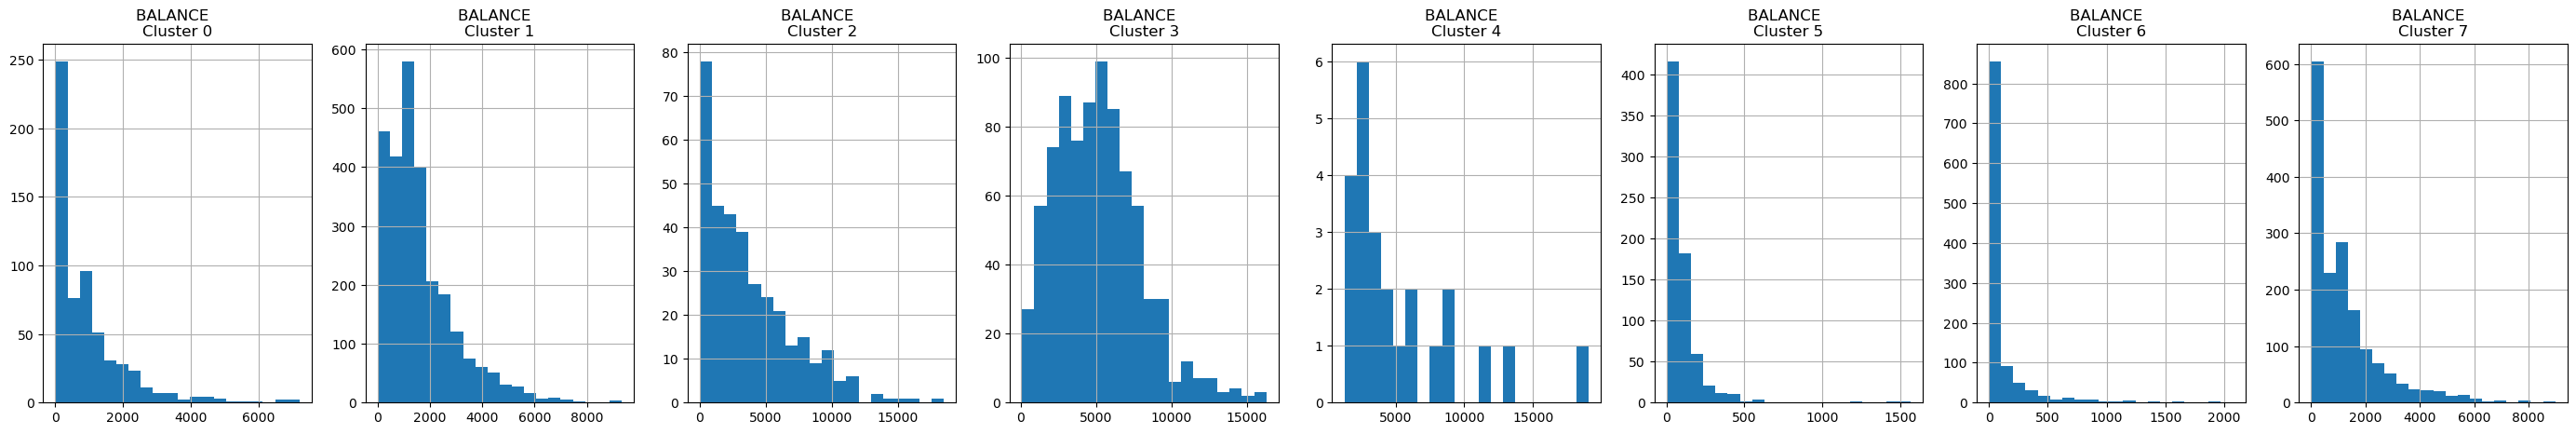

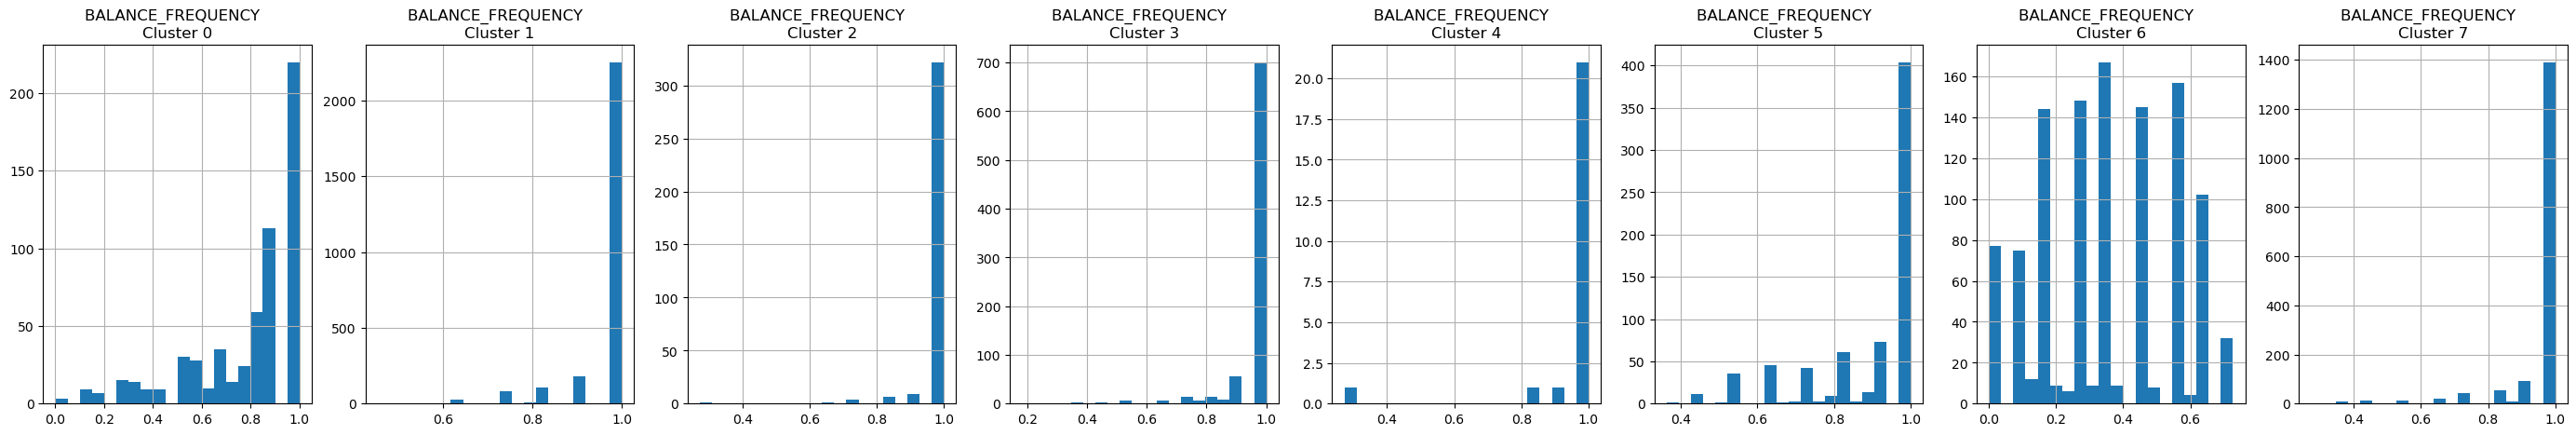

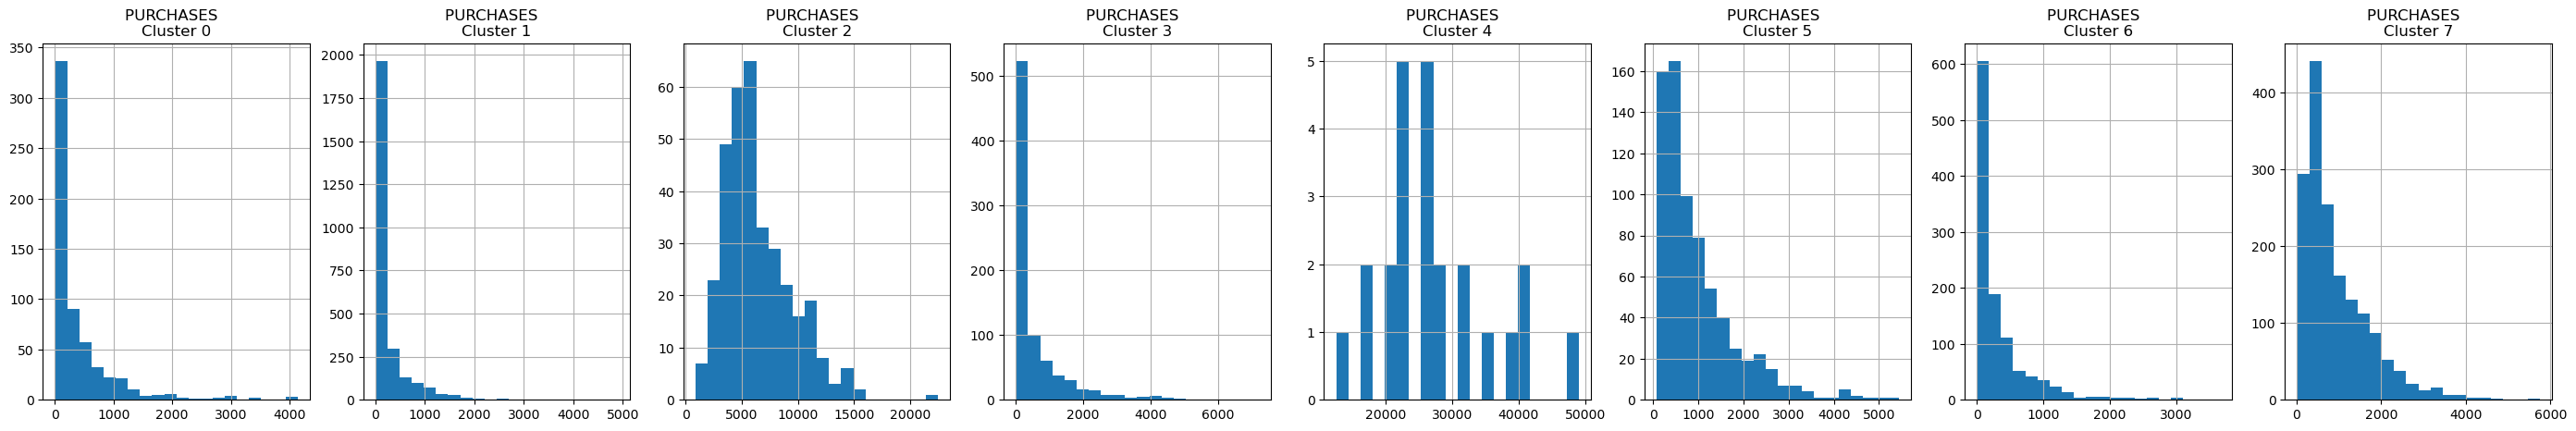

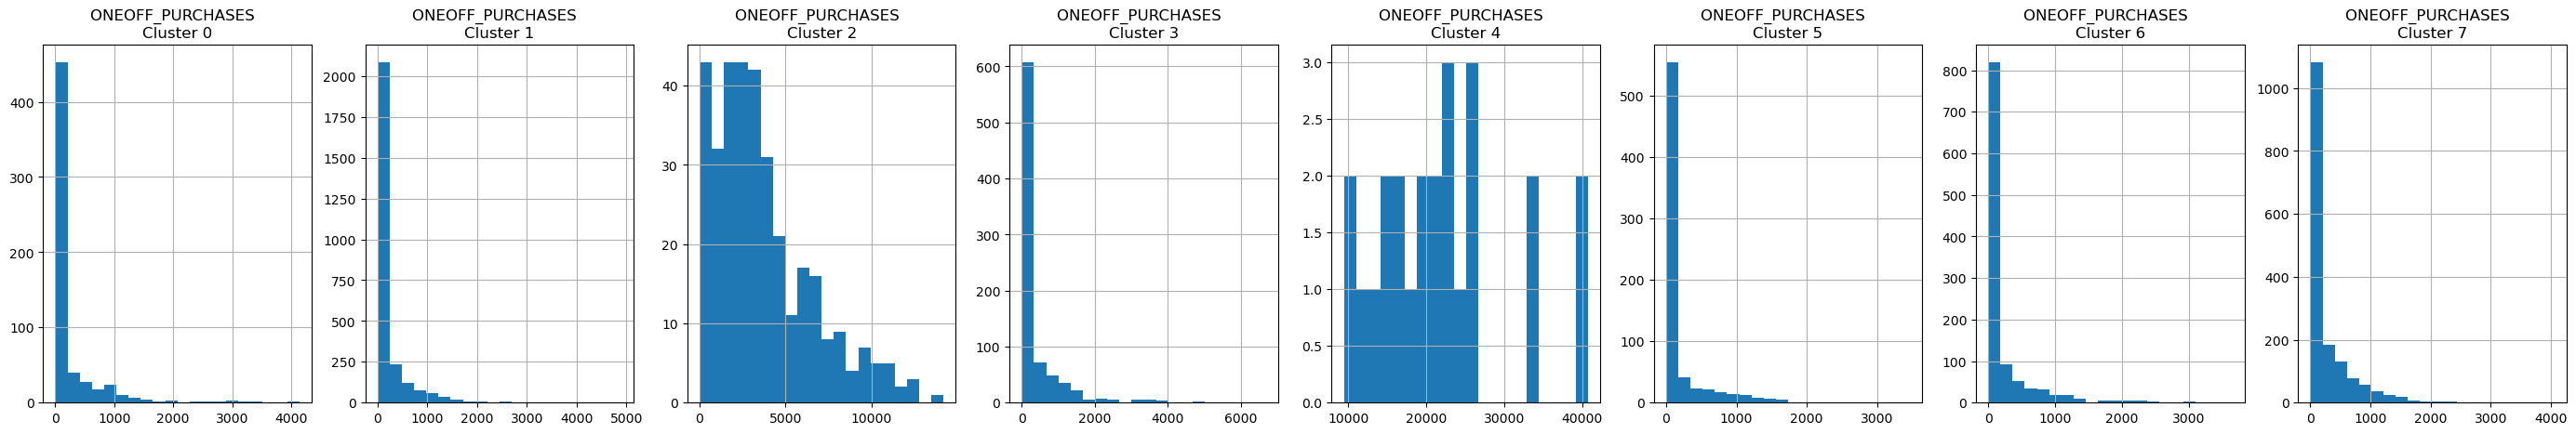

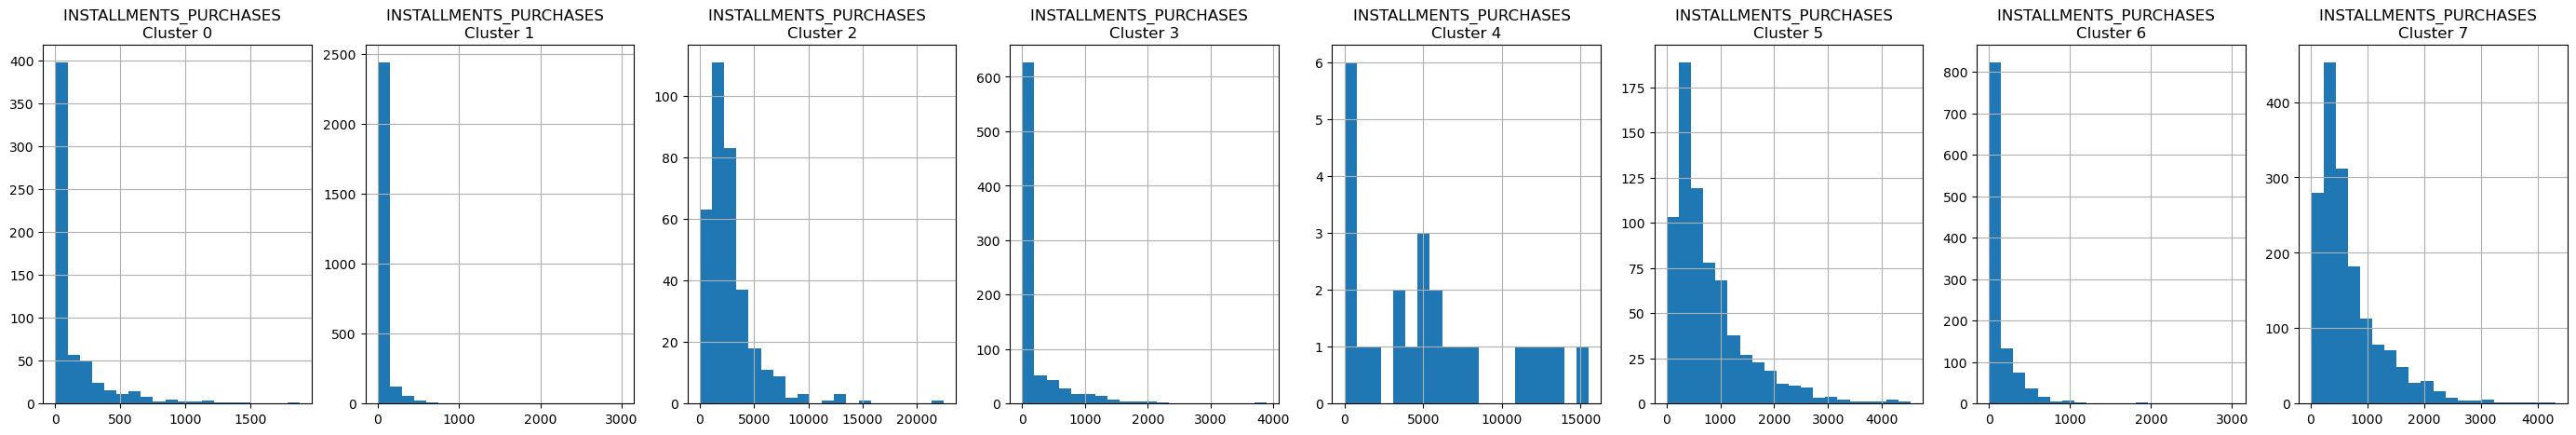

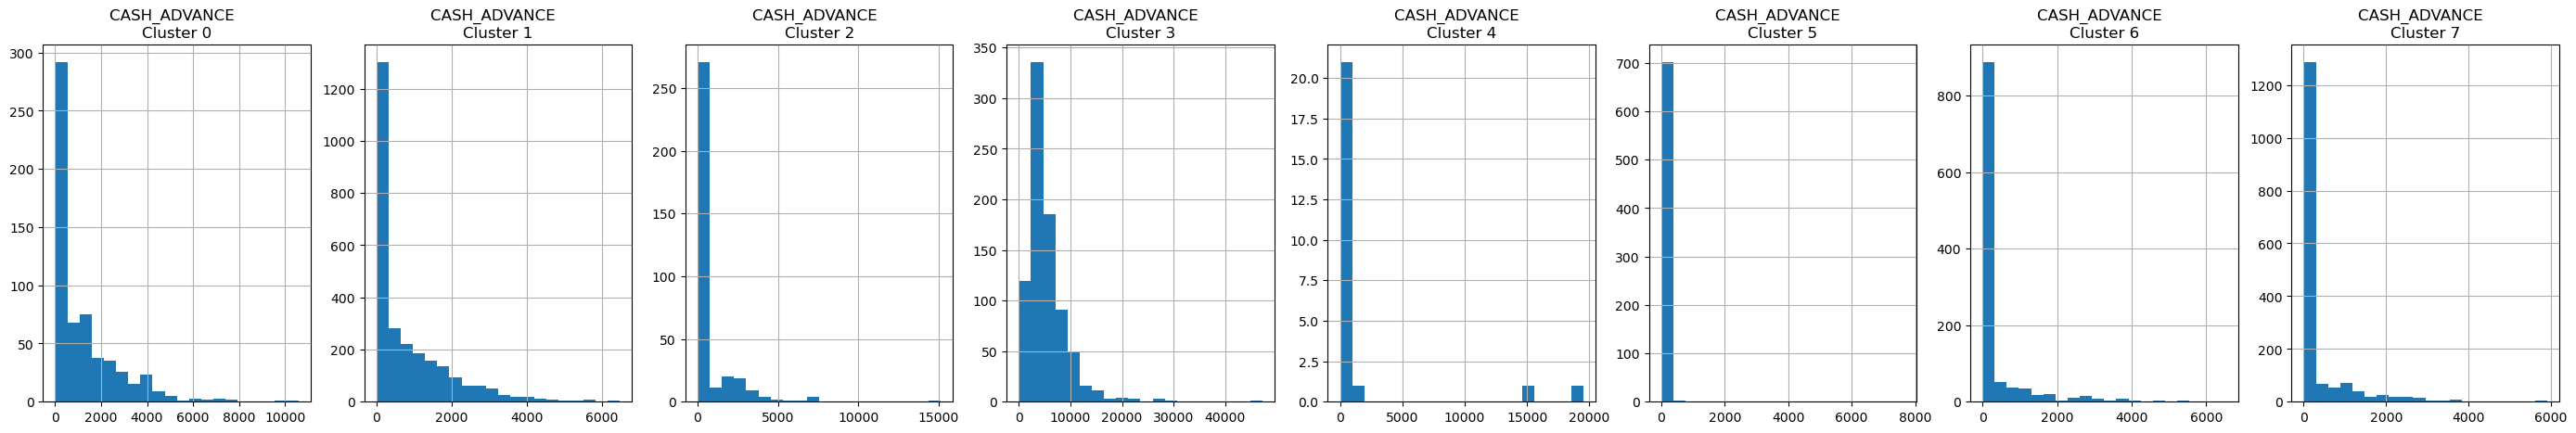

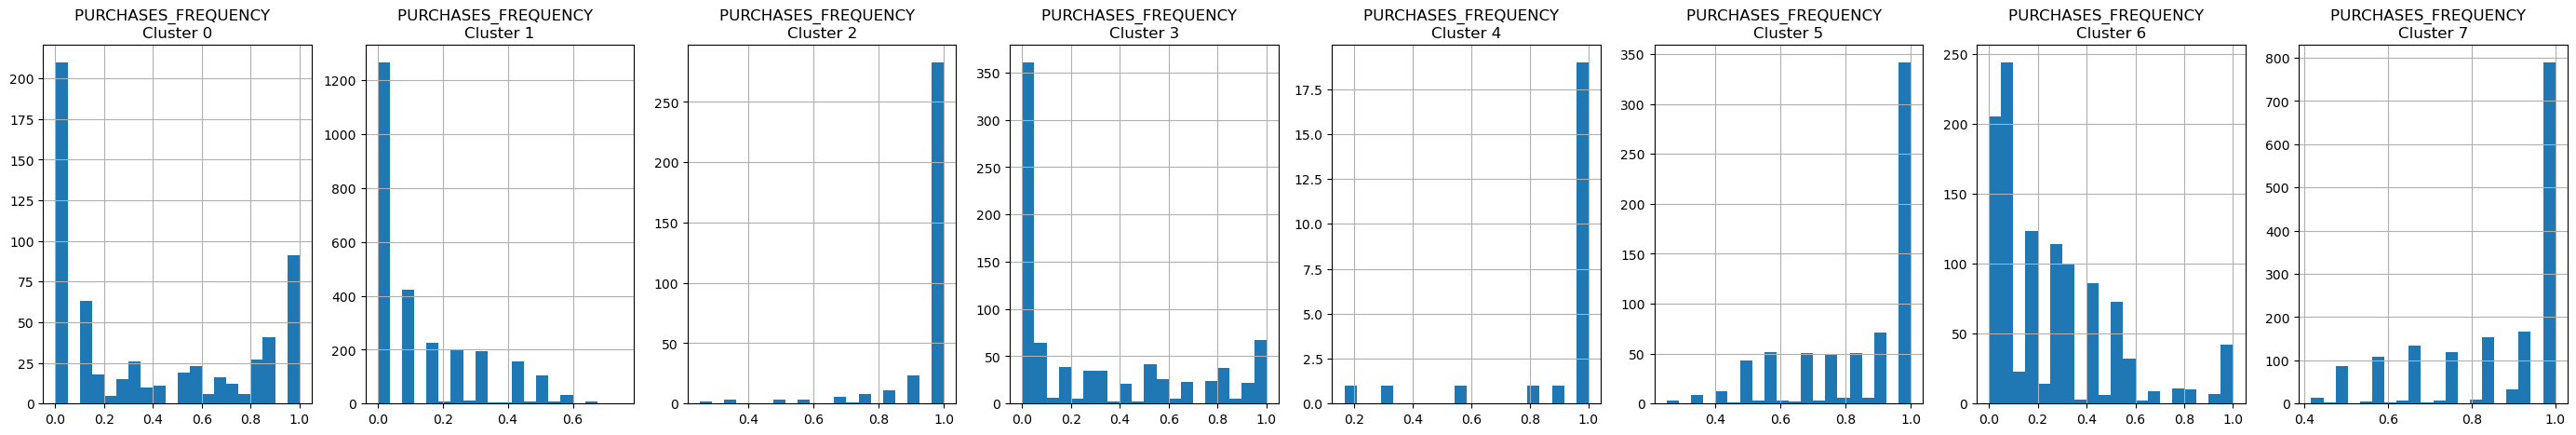

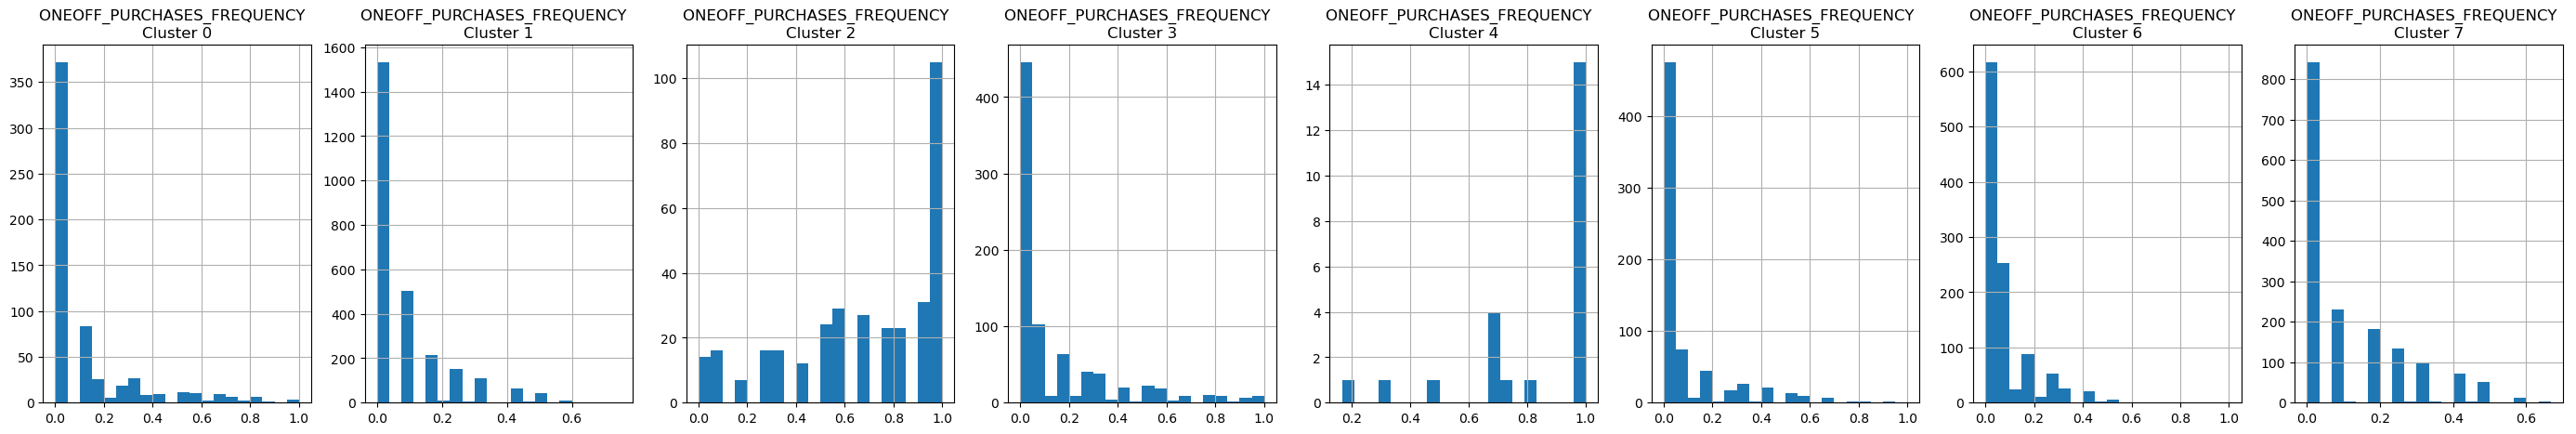

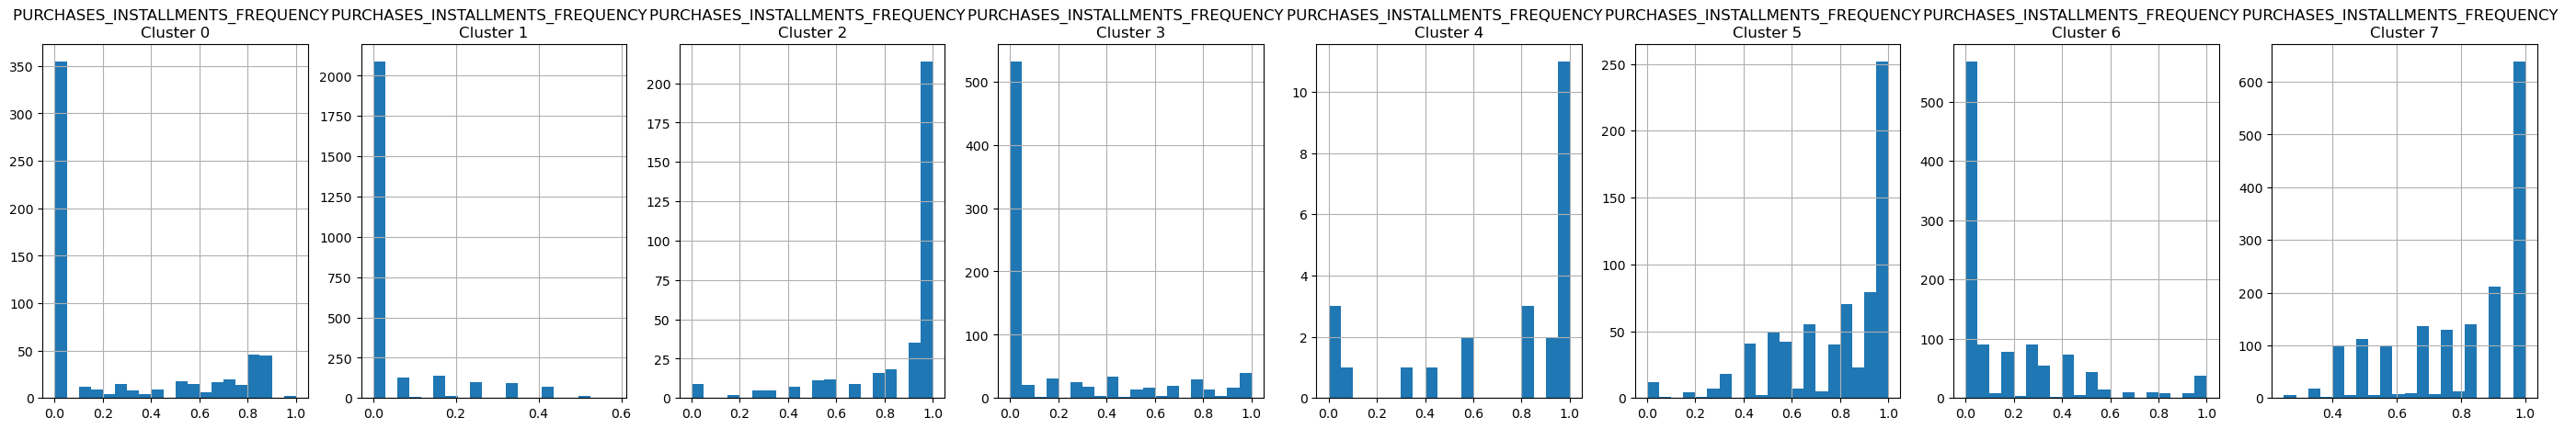

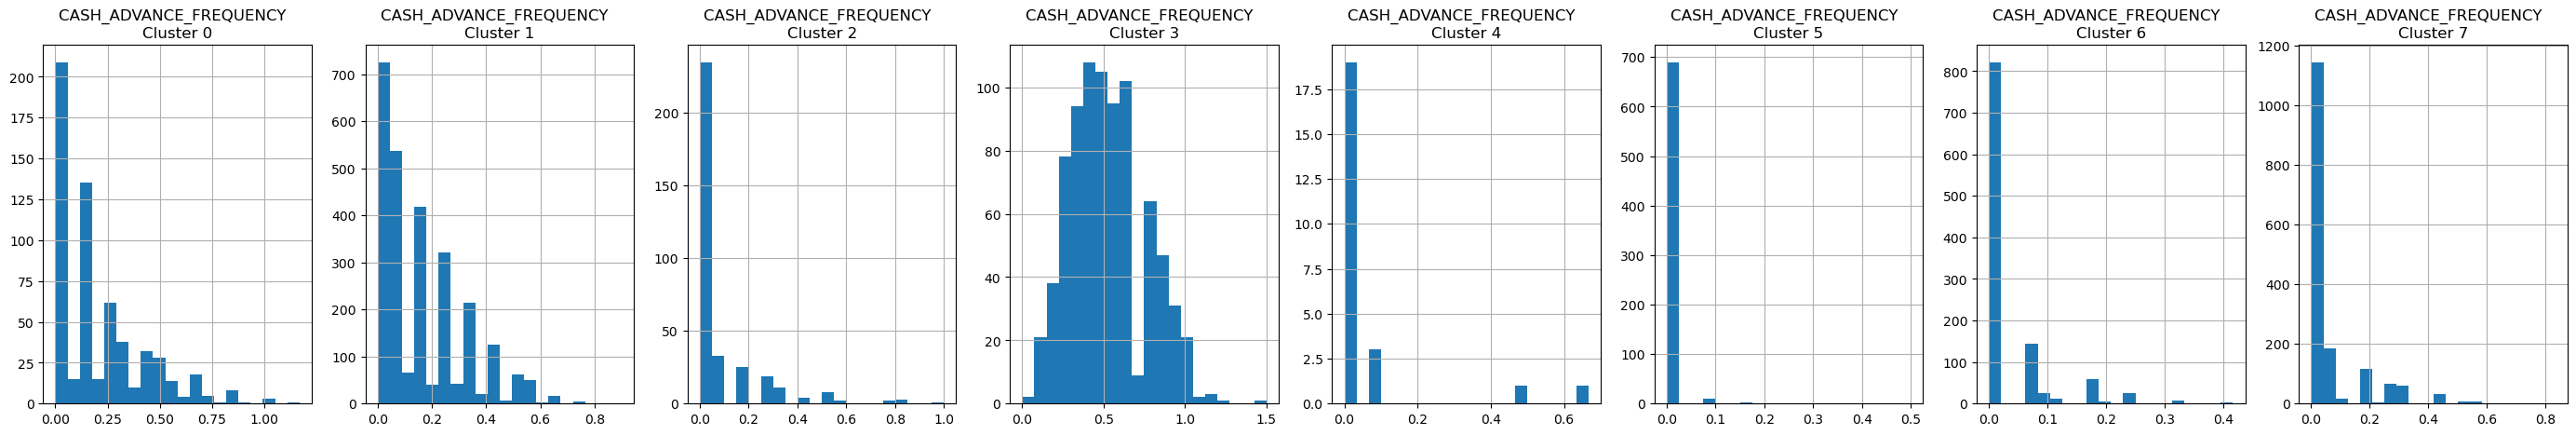

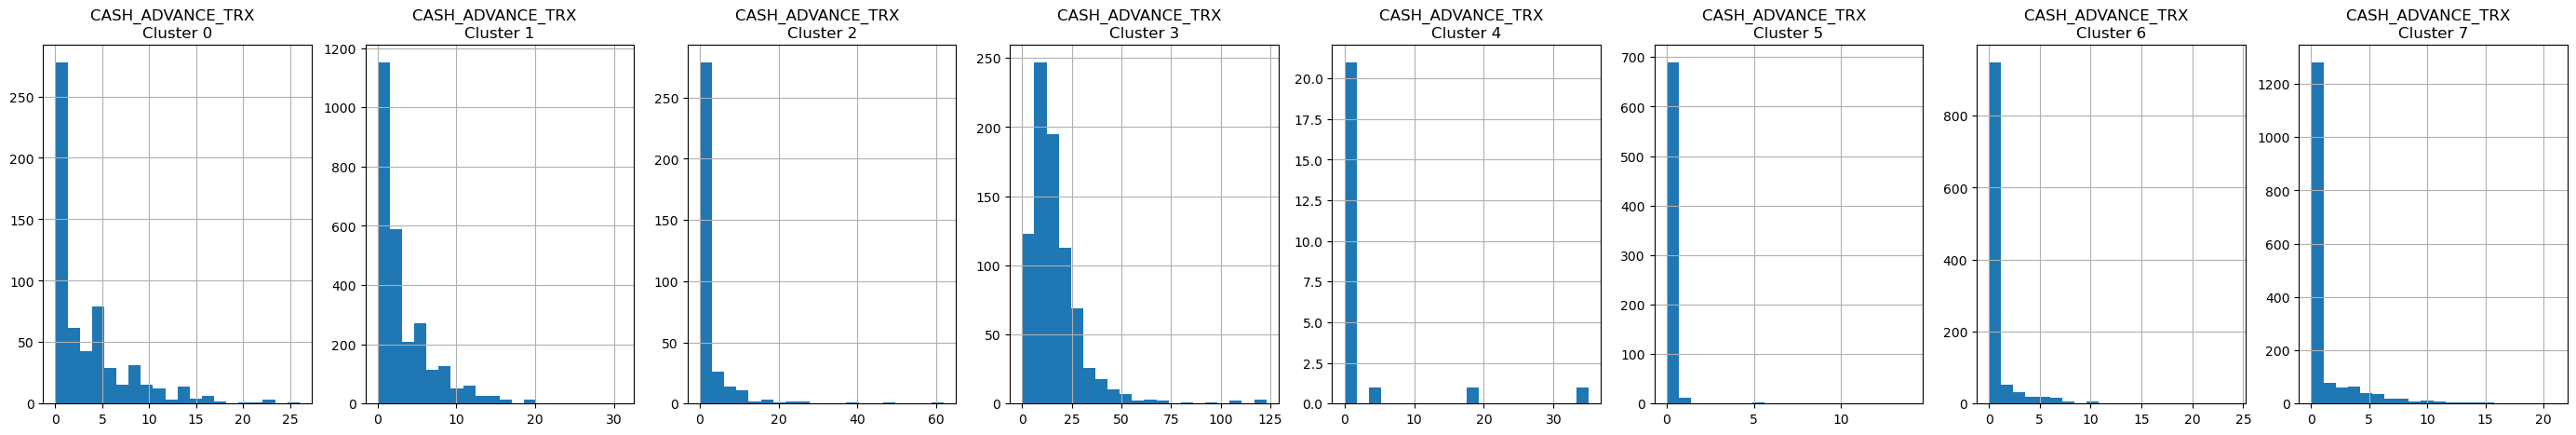

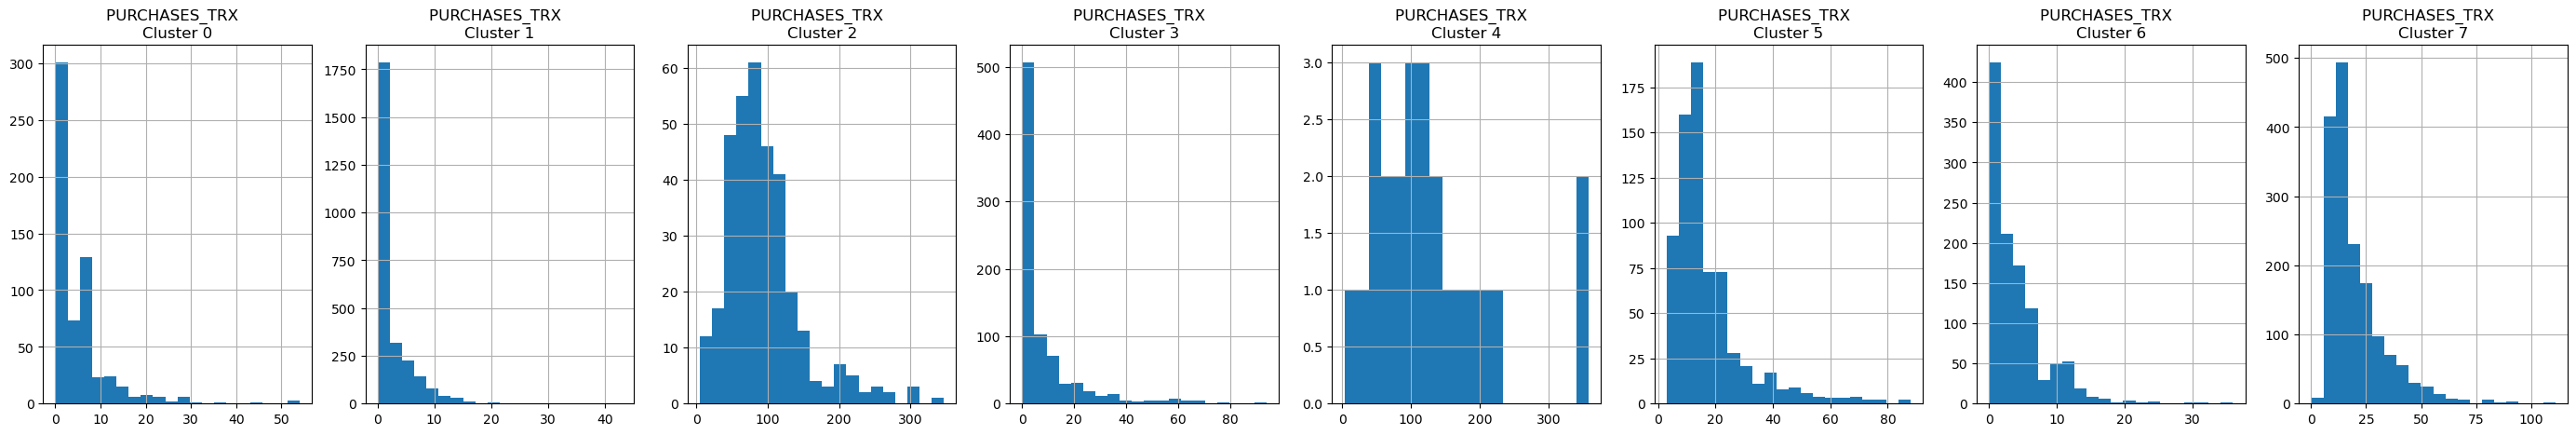

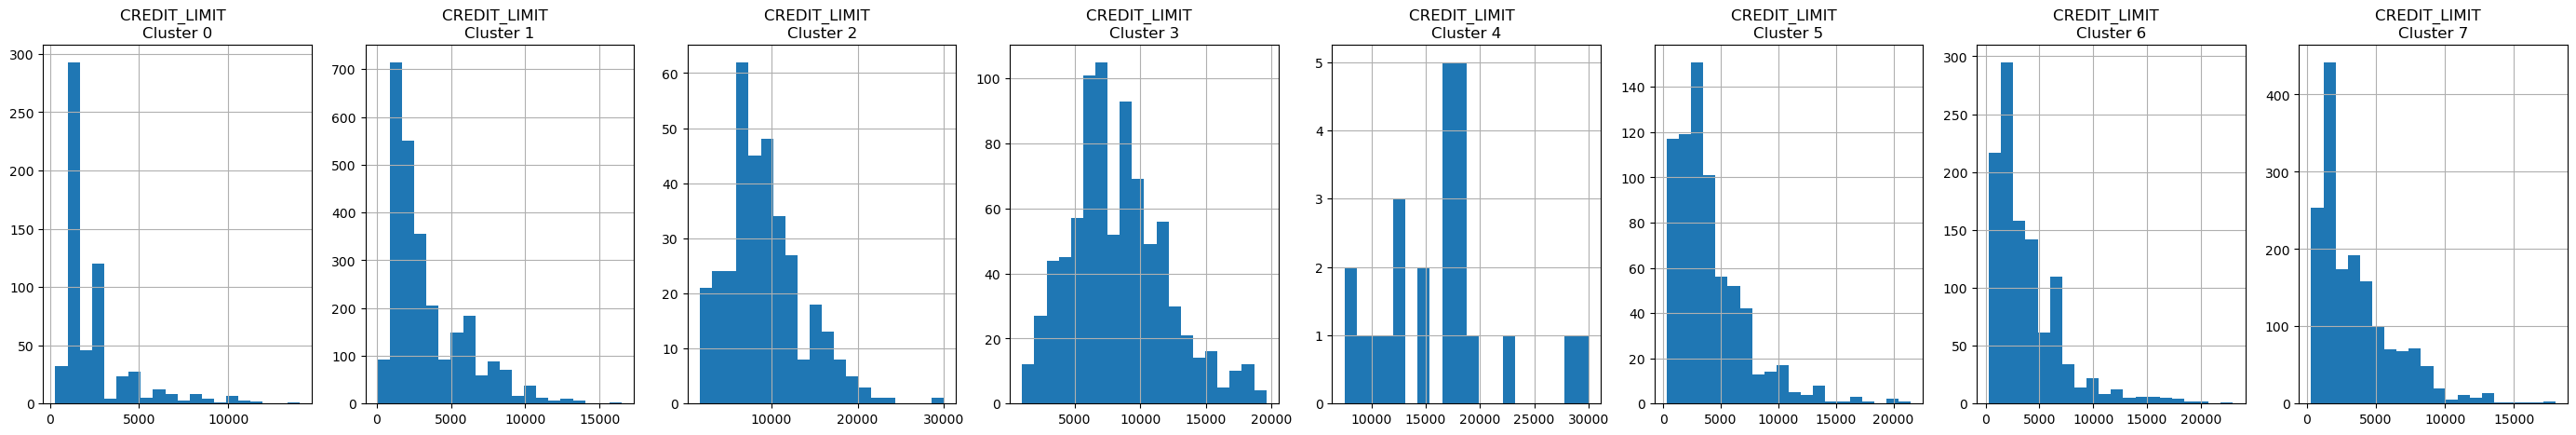

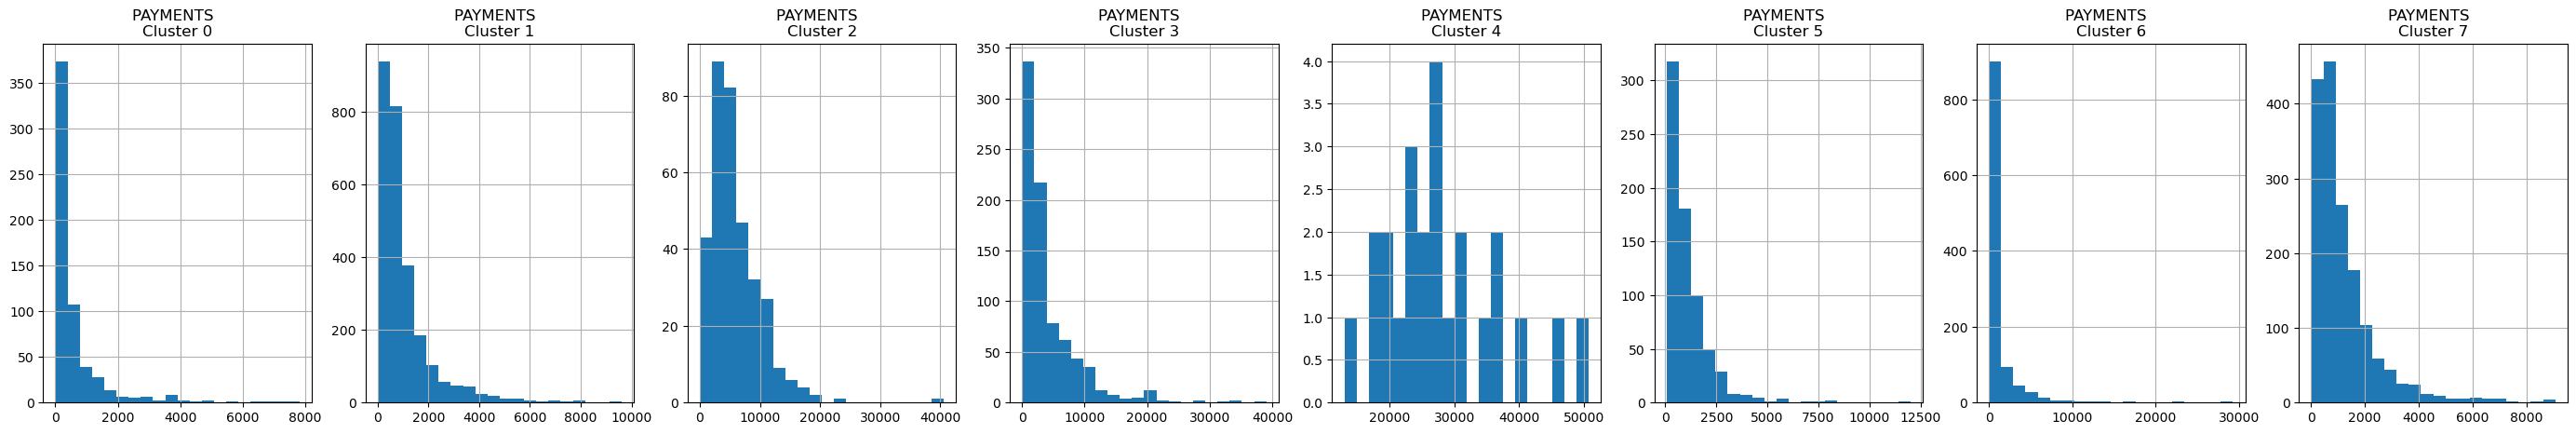

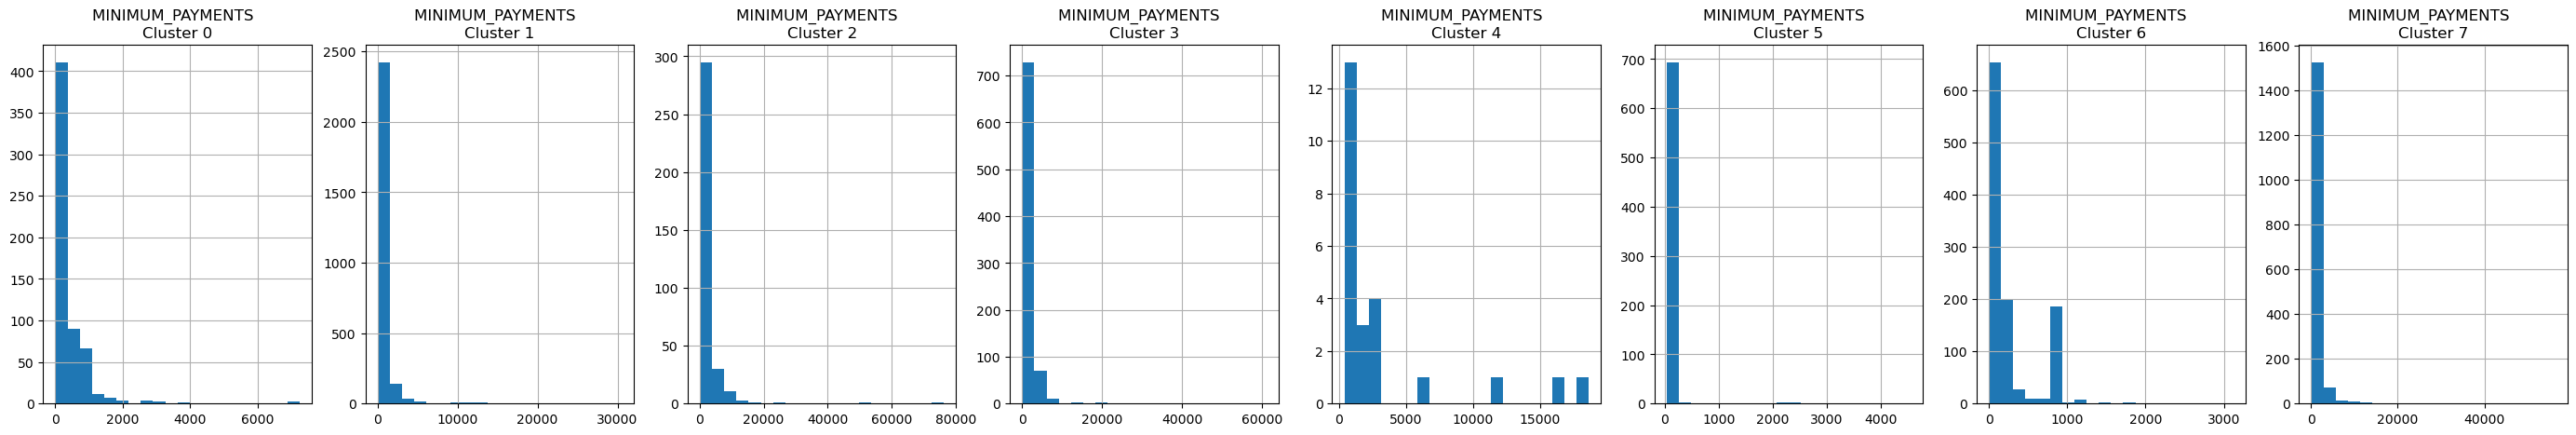

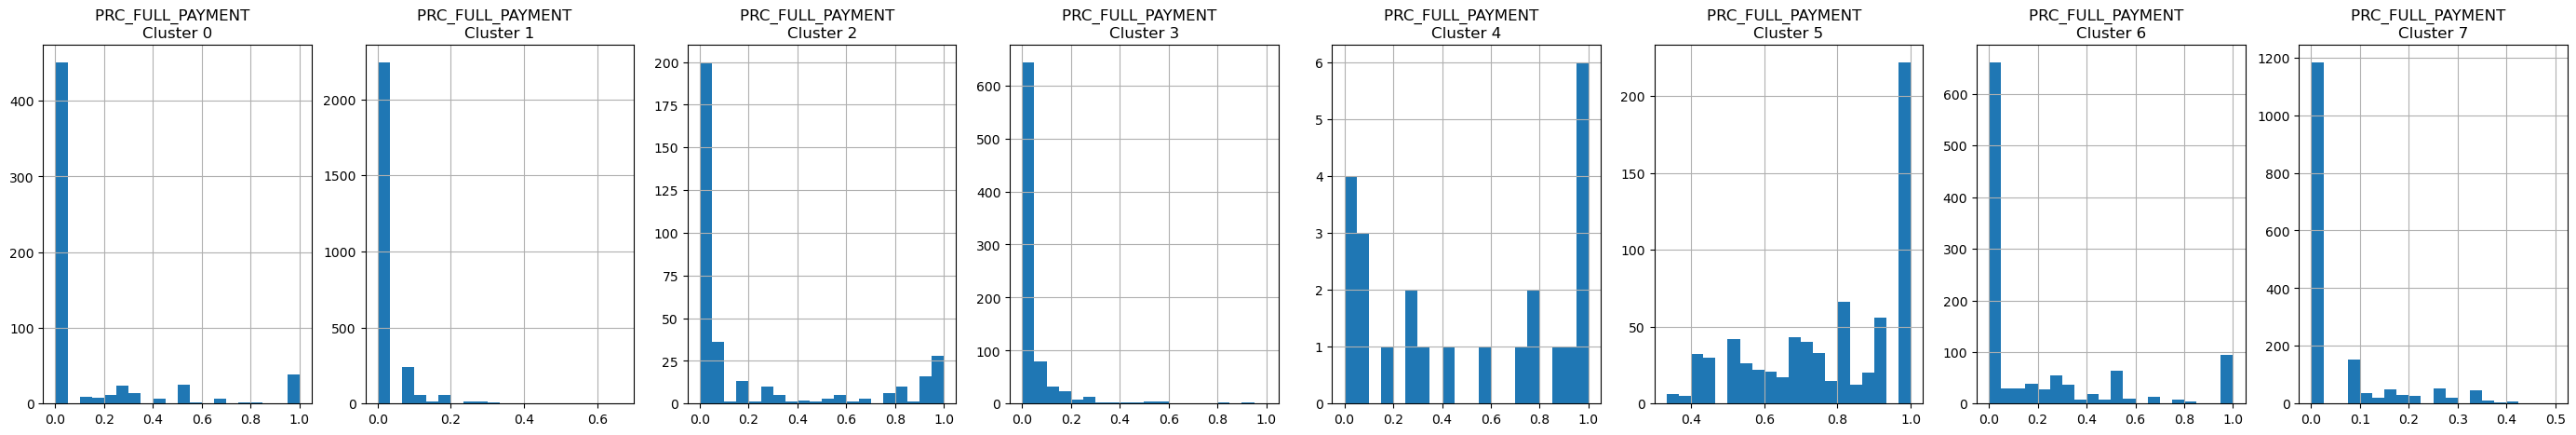

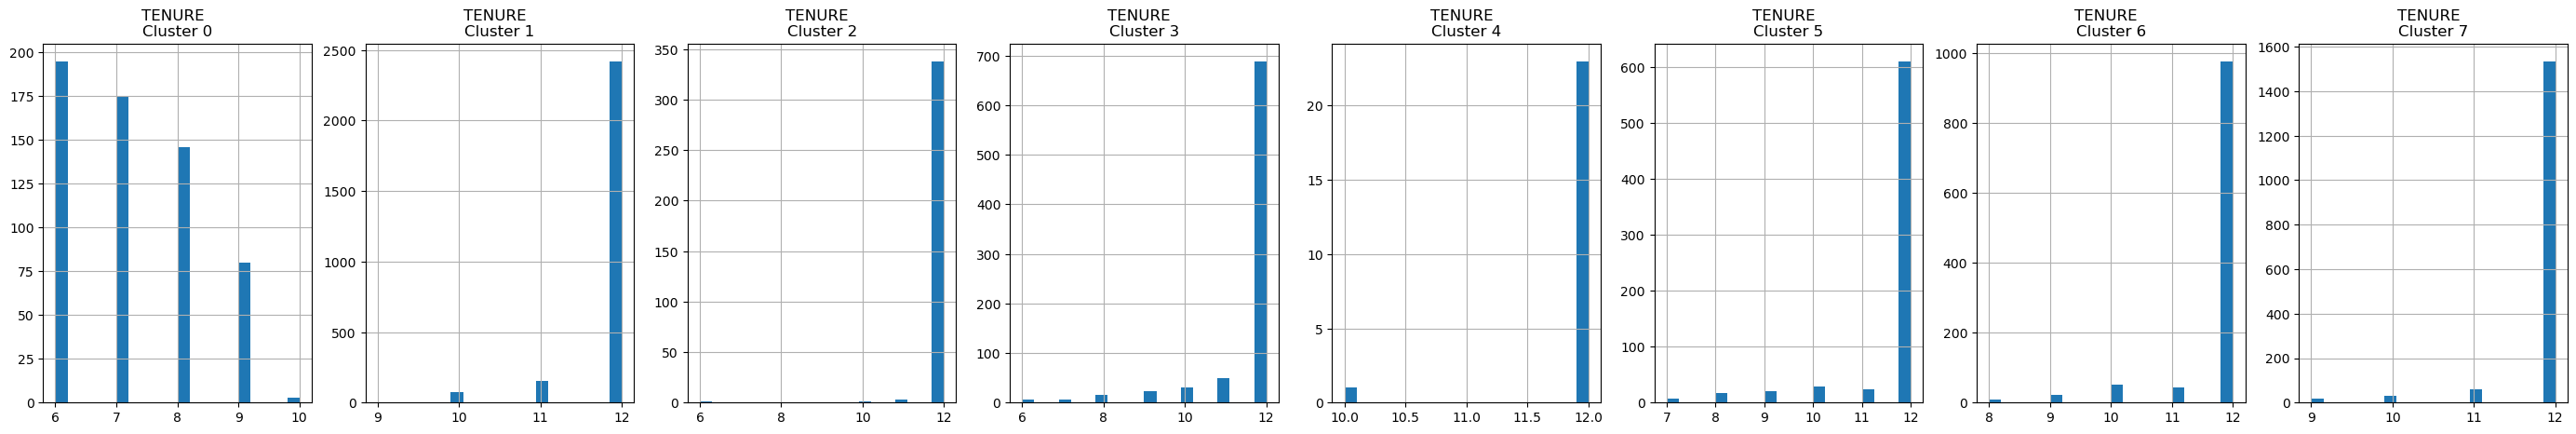

In [36]:
# Histogram
for i in creditcard.columns:
    plt.figure(figsize = (35, 5))
    
    for x in range(8):
        plt.subplot(1, 8, x+1)
        cluster = creditcard_cluster[creditcard_cluster['cluster'] == x]
        cluster[i].hist(bins = 20)
        plt.title('{}  \nCluster {}'.format(i, x))
    plt.show()

In [37]:
# Number of components = 2
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_scaled)
principal_comp

array([[-1.68224192, -1.07638174],
       [-1.138196  ,  2.50659024],
       [ 0.96971998, -0.38346378],
       ...,
       [-0.92629171, -1.8108239 ],
       [-2.33661318, -0.65795698],
       [-0.5564876 , -0.40050129]])

In [38]:
# Create Dataframe using two components (pca1 and pca2)

pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682242,-1.076382
1,-1.138196,2.506590
2,0.969720,-0.383464
3,-0.873608,0.043132
4,-1.599438,-0.688483


In [39]:
# Concatenante(join the 'pca_df' with 'cluster') the cluster labels to the Dataframe

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster' : labels})], axis = 1)
pca_df.head()

# Cluster column indicates to which cluster pca1 and pca2 belong.

,pca1,pca2,cluster
0,-1.682242,-1.076382,1
1,-1.138196,2.506590,3
2,0.969720,-0.383464,8
3,-0.873608,0.043132,1
4,-1.599438,-0.688483,1


In [40]:
pca_df['cluster'].unique()

array([1, 3, 8, 7, 2, 6, 0, 5, 4])

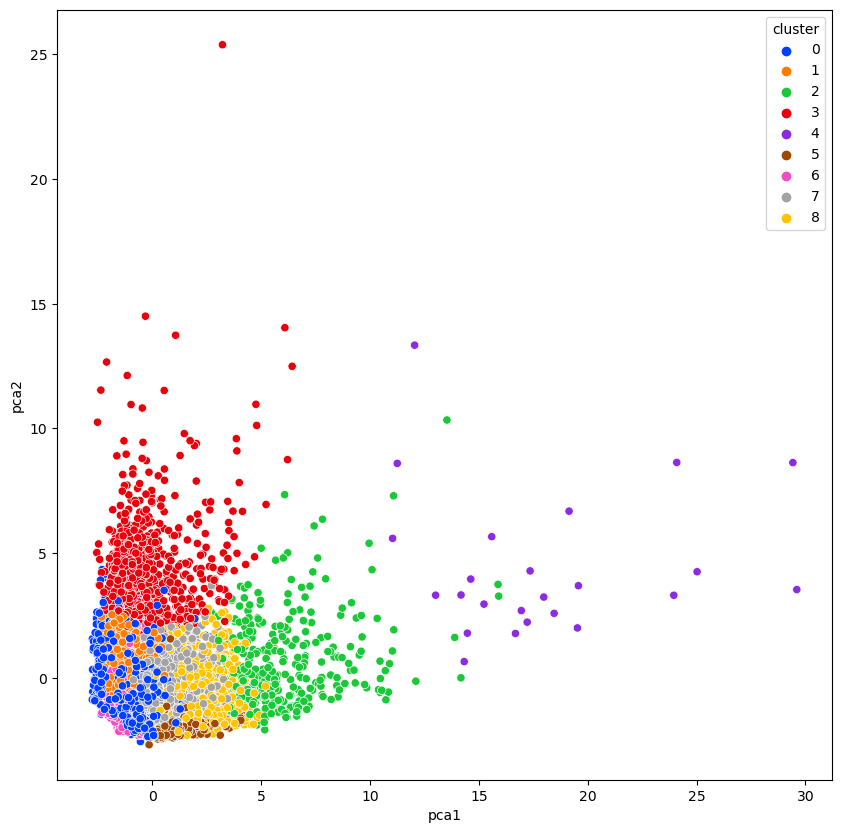

In [53]:
# Scatterplot with different cluster

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', data = pca_df, hue = 'cluster', palette = 'bright')
plt.show()